# Covid-19 Prediction - Logistic Regression Algorithm 

Dataset is found from the website: https://www.kaggle.com/datasets/hemanthhari/symptoms-and-covid-presence?resource=download.

### Importing Libraries

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import metrics

### Converting CSV File Into a Dataframe

In [14]:
df = pd.read_csv("Covid Dataset.csv")
df = df.replace({'Yes':1,'No':0}) #turning values from yes/no to 1/0
print(df.head())

   Breathing Problem  Fever  Dry Cough  Sore throat  Running Nose  Asthma  \
0                  1      1          1            1             1       0   
1                  1      1          1            1             0       1   
2                  1      1          1            1             1       1   
3                  1      1          1            0             0       1   
4                  1      1          1            1             1       0   

   Chronic Lung Disease  Headache  Heart Disease  Diabetes  ...  Fatigue   \
0                     0         0              0         1  ...         1   
1                     1         1              0         0  ...         1   
2                     1         1              0         1  ...         1   
3                     0         0              1         1  ...         0   
4                     1         1              1         1  ...         0   

   Gastrointestinal   Abroad travel  Contact with COVID Patient  \
0      

### Analyzing Raw Data and Performing Feature Selection

In [15]:
df.describe(include="all") #looking at data and seeing irregularities (all 0s/1s or almost entirely one or the other)

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,...,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
count,5434.000000,5434.000000,5434.000000,5434.000000,5434.000000,5434.000000,5434.000000,5434.000000,5434.000000,5434.000000,...,5434.000000,5434.000000,5434.000000,5434.000000,5434.000000,5434.000000,5434.000000,5434.0,5434.0,5434.000000
mean,0.666176,0.786345,0.792602,0.727457,0.543246,0.462643,0.472028,0.503497,0.464299,0.476261,...,0.519139,0.469452,0.451049,0.501656,0.461907,0.518955,0.416268,0.0,0.0,0.806588
std,0.471621,0.409924,0.405480,0.445309,0.498172,0.498648,0.499263,0.500034,0.498770,0.499482,...,0.499680,0.499112,0.497644,0.500043,0.498593,0.499687,0.492984,0.0,0.0,0.395009
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000
25%,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.0,0.0,1.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,1.000000


In [16]:
#Dropping the features, "Wearing Masks" and "Sanitization from Market"
df2 = df.drop(['Wearing Masks', 'Sanitization from Market'], axis=1)

In [17]:
#syntax for correlation function: https://pandas.pydata.org/docs/reference/api/pandas.io.formats.style.Styler.background_gradient.html
correlation_matrix = df2.corr()
correlation_matrix
correlation_matrix.style.background_gradient(cmap='Blues', axis=None)

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,Hyper Tension,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,COVID-19
Breathing Problem,1.000000,0.089903,0.159562,0.303768,0.055190,0.075318,-0.098291,-0.062172,-0.073366,0.055427,0.045256,0.000561,-0.075390,0.117795,0.214634,0.200304,0.066688,0.018295,0.443764
Fever,0.089903,1.000000,0.127580,0.322235,0.081758,0.073953,-0.025160,-0.035416,-0.031462,0.050286,0.079001,-0.060458,-0.008067,0.128726,0.164704,0.070490,0.002252,0.012102,0.352891
Dry Cough,0.159562,0.127580,1.000000,0.213907,-0.030763,0.086843,-0.043664,-0.035912,0.047566,-0.006593,0.081989,-0.039909,0.008251,0.331418,0.128330,0.117963,0.086176,0.163102,0.464292
Sore throat,0.303768,0.322235,0.213907,1.000000,0.039450,0.081377,-0.050440,-0.015971,0.002177,0.001938,0.042811,-0.023290,0.025886,0.205986,0.189251,0.216438,0.079055,0.104378,0.502848
Running Nose,0.055190,0.081758,-0.030763,0.039450,1.000000,-0.022763,-0.014376,0.068479,-0.056750,0.042961,-0.020445,0.007026,-0.014673,0.034526,0.003776,0.061099,0.032568,-0.061323,-0.005657
Asthma,0.075318,0.073953,0.086843,0.081377,-0.022763,1.000000,-0.033771,0.037064,0.076783,-0.012060,0.017707,0.006564,0.101909,0.068286,0.005046,-0.044592,0.020941,-0.115679,0.089930
Chronic Lung Disease,-0.098291,-0.025160,-0.043664,-0.050440,-0.014376,-0.033771,1.000000,-0.050480,-0.039860,0.046789,-0.010331,-0.047655,-0.050333,-0.088854,-0.062482,-0.020548,-0.093049,0.038343,-0.056837
Headache,-0.062172,-0.035416,-0.035912,-0.015971,0.068479,0.037064,-0.050480,1.000000,0.048471,0.032390,-0.207489,0.052035,0.097778,0.043589,-0.082101,-0.162992,-0.005790,-0.012625,-0.027793
Heart Disease,-0.073366,-0.031462,0.047566,0.002177,-0.056750,0.076783,-0.039860,0.048471,1.000000,-0.032956,0.049139,-0.058925,0.004121,-0.020761,-0.025593,-0.045437,0.086169,0.035000,0.027072
Diabetes,0.055427,0.050286,-0.006593,0.001938,0.042961,-0.012060,0.046789,0.032390,-0.032956,1.000000,0.042543,-0.043903,0.040651,0.039013,-0.085696,-0.061650,-0.078212,0.097696,0.040627


In [18]:
#Removing features that had a value close to 0 for 'COVID-19' in the correlation matrix 
dropped_features = list(("Running Nose", "Asthma", "Chronic Lung Disease", "Headache",
                        "Heart Disease", "Diabetes", "Hyper Tension", "Fatigue ", "Gastrointestinal "))
data = df2.drop(dropped_features, axis=1)
data.head()

,Breathing Problem,Fever,Dry Cough,Sore throat,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,COVID-19
0,1,1,1,1,0,1,0,1,1,1
1,1,1,1,1,0,0,1,1,0,1
2,1,1,1,1,1,0,0,0,0,1
3,1,1,1,0,1,0,1,1,0,1
4,1,1,1,1,0,1,0,1,0,1


**Description of Feature Selection** 
<br>
According to the summaries of the raw data, we can see that "wearing masks" and "sanitization from market" both have only 0s (as indicated by mean and std being 0). As such, we can removed these two features from our dataframe as they will not impact our data.
<br>
<br>
In our correlation matrix of our features, we see that there are some values that are around 0 in the "COVID-19" row/col. This is indicated as having little to no correlation between the variables. Having values closer to +1 and -1 indicate there are strong relationship. In our case, we want to remove variables/predictors that have little impact to COVID-19. As such, we will remove them from our dataframe. These features that we are removing are "Running Nose", "Asthma", "Chronic Lung Disease", "Headache", "Heart Disease", "Diabetes", "Hyper Tension", "Fatigue", and "Gastrointestinal".

### Splitting Data Into Training and Testing Sets

In [19]:
#Splitting data into x and y
x = data.drop("COVID-19", axis=1)
y = data["COVID-19"]
#80:20 split in data for training and testing
x_tr, x_te, y_tr, y_te = train_test_split(x, y, test_size = 0.20)

### Training the Data Using Logistic Regression

In [20]:
#Creating a model and training/fitting it to the training dataset
model = LogisticRegression()
fitted_model = model.fit(x_tr, y_tr)

### Predicting New Data

In [21]:
#Predicting whether each person has covid on the testing set using the fitted model
pred = fitted_model.predict(x_te)

### Confusion Matrix of the Results

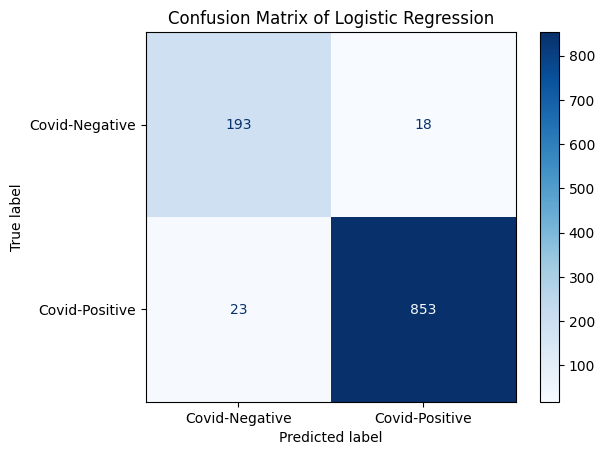

Accuracy = 96.23%
Precision = 97.93%
sensitivity = 97.37%
specificity = 91.47%


In [22]:
#Creating the confusion matrix using predicted values and testing values
cm = metrics.confusion_matrix(y_te, pred)
cm_plt = ConfusionMatrixDisplay(cm, display_labels = ["Covid-Negative", "Covid-Positive"])
cm_plt.plot(cmap = "Blues")
cm_plt.ax_.set_title("Confusion Matrix of Logistic Regression") #adding a title to the confusion matrix
plt.show()

#Calculating the summaries of the confusion matrix and printing the results (range of 0-1)
accuracy = metrics.accuracy_score(y_te, pred)*100
precision = metrics.precision_score(y_te, pred)*100
sensitivity = metrics.recall_score(y_te, pred)*100
specificity = metrics.recall_score(y_te, pred, pos_label=0)*100
print("Accuracy = " + str(accuracy.round(2)) + "%")
print("Precision = " + str(precision.round(2)) + "%")
print("sensitivity = " + str(sensitivity.round(2)) + "%")
print("specificity = " + str(specificity.round(2)) + "%")